# 1. Người dùng và phân quyền trong Unix

#### Chúng ta sẽ tìm hiểu về:
- Hệ thống files trong Unix
- Người sử dụng và phân quyền trong Unix

### Cấu trúc hệ thống Unix

Trong Unix, mọi thứ đều là files. Có nghĩa là tệp, thư mục, socket, ... đều được thể hiện bằng một [Đặc tả tập tin](https://vi.wikipedia.org/wiki/%C4%90%E1%BA%B7c_t%E1%BA%A3_t%E1%BA%ADp_tin)

Trong Unix bạn sẽ có một **thư mục Root** là cha của tất cả các thư mục con. Chúng ta có thể đi đến thư mục root bằng cách gõ câu lệnh **cd /**. Khi ở thư mục root, bạn thông thường sẽ thấy các thư mục con sau:

- **bin**: chứa các tệp binary hay nói cách khác là chứa các Commands bạn có thể gọi.
- **boot**: chứa các tệp hệ thống Unix dùng để chạy hệ thống.
- **dev**: chứa tất cả các tệp liên quan đến thiết bị như USB, ổ đĩa CD, ...
- **etc**: chứa các tệp cấu hình của Unix
- **home**: chứa các tệp của người dùng

![root-folder.png](images/root-folder.png)
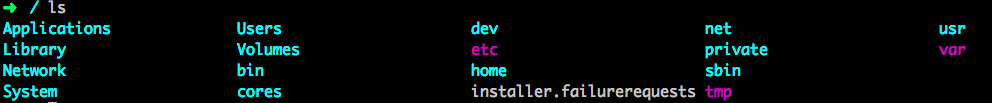

### Người dùng, nhóm và Super-user

Bạn đã biết mọi thứ trong Unix đều được thể hiện bằng file, bây giờ bạn sẽ thấy mọi file đều được quản lý bỡi quyền truy cập, cụ thể là:
- Quyền truy cập được áp dụng trên nhiều đối tượng người dùng khác nhau
- Mỗi người dùng thuộc vào một nhóm
- Root là super-user

🏆 Nhớ kỹ nha các bạn
- Với câu lệnh **ls -l \<file>**, bạn có thể thấy phân quyền của tệp đó
- Sử dụng câu lệnh **chmod** và **chown** để thay đổi quyền của tệp

![files-permissions-and-ownership-basics-in-Linux.png](./images/files-permissions-and-ownership-basics-in-Linux.png)
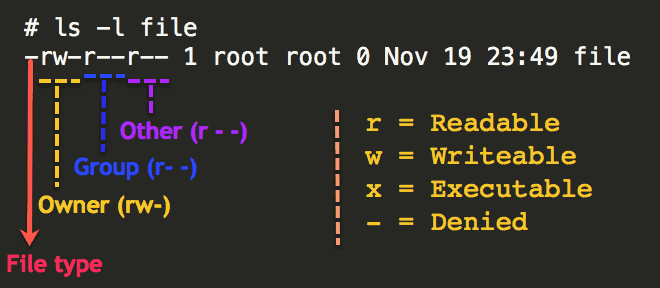

➡️ Cách sử dụng super-user

```
# Switch to super user (use exit to go back)\n
sudo su
# Execute one command with super user privileges
sudo apt-get install ...
```

### Thay đổi quyền truy cập và sở hữu

Để thay đổi quyền của 1 tập tin, bạn dùng 2 lệnh `chown` và `chmod` nhé
- **chown** thay dổi quyền sở hưu theo người dùng và nhóm người dùng trên file
- **chmod** thay đổi quyền truy cập vào file

Ví dụ, chúng ta có file tên là `run_server.sh`

`-rwxr-xr--  1 personA  staff  1351 Feb 14 21:29 run-server.sh`

Chúng ta có thể hiểu là
- Người sở hữu file là **personA**: có thể đọc, ghi, và thực thi file
- Nhóm sở hữu file là **staff**: tất cả các thành viên trong nhóm chỉ có quyền đọc và thực thi trên file (r-x)
- Tất cả các người dùng khác chỉ có quyền đọc file (r--)

Chú ý là `-rwxr-xr--` có thể được thể hiện như sau:
- 7 cho người sở hữu (4 cho r, 2 cho w và 1 cho x)
- 5 cho nhóm sở hữu (4 cho r, 1 cho x)
- 4 cho những người dùng khác (4 cho r)

Okie, chúng ta đã biết khái niệm phân quyền trên file, bây giờ chúng ta sẽ thử áp dụng ha:

`chown personB:staffEmployee run-server.sh`

Dòng lệnh trên sẽ thay đổi quyền sở hữu của file `run_server.sh` từ **personA** qua **personB** và từ nhóm người dùng là **staffEmployee**


`chmod 777 run-server.sh`

Dòng lệnh trên sẽ cấp quyền đọc, ghi và thực thi cho **mọi người** trên file `run_server.sh` (`read = 4, write = 2, execute = 1`). Bạn cần chú ý khi sử dụng nhé.

`chmod g+w run-server.sh`

Dòng lệnh trên thêm quyền ghi vào nhóm sở hữu trên file `run_server.sh`

# Bash Script

Đôi lúc bạn phải thực hiện nhiều câu lệnh với những tham biến khác nhau, để tiết kiệm thời gian, bạn hãy dùng scripting nhé!

### 1. Tạo và thực thi script

##### Bước 1: Tạo file script

```
nano hello.sh  # Create & open the file with nano editor (you can use any other text editor of your choice)
echo "hello world !"  # Command to write in the file
```

##### Bước 2: Thực thi script

```
chmod 744 hello.sh  # Make file executable for owner
./hello.sh  # Execute file
```

### 2. Truyền tham số cho script

Bạn đã tạo được bash script đầu tiên là `hello.sh` và thực thi nhưng đôi lúc bạn cần phải truyền tham số cho các câu lệnh bạn thực thi trong script nữa. Sau đây là một ví dụ tạo script `arguments.sh`, mình sẽ giải thích tiếp sau:

```
#!/bin/bash
echo "All arguments: " $@
echo "Number of arguments :" $#

echo "First argument : " $1
echo "Second argument :" $2
```

- Tham số sẽ được truyền vào script khi thực thi qua cấu trúc `$@`
- `$1` sẽ là tham số thứ nhất và tiếp tục như vậy
- Bash script luôn luôn bắt đầu bằng `#!/bin/bash`

### 3. Điều hướng trong bash script

Scripting cũng giống như những ngôn ngữ lập trình khác, bạn cũng có thể sử dụng các câu lệnh điều hướng.

```
# IF condition (respect spaces)
if [ test ]
then
        echo "Test passed"
else
        echo "Test failed"
fi
```

Bạn cũng có thề dùng các phép so sánh như sau:

```
#!/bin/bash
if [ $# -ge 1 ]
then
    head -n 2 $@ | grep "WARNING" >> logs_warnings.txt
else
    echo "ERROR: Missing file argument"
fi
```

- `$#` là số tham số được truyền vào script 
- `-gt` nghĩa là lớn hơn, 
- `-ge` là lớn hơn hoặc bằng, 
- `-lt` và `-le` là nhỏ hơn, 
- `-eq` và `-ne` nghĩa là bằng hoặc không bằng

### 4. Biến môi trường (environment variables) và alias

Biến môi trường là biến của hệ thống được sử dụng bởi các ứng dụng shell. Ví dụ: biến môi trường có thể lưu trữ thông tin về trình soạn thảo văn bản hoặc trình duyệt mặc định , đường dẫn đến các tệp thực thi hoặc cài đặt bố cục bàn phím và hệ thống.

Ví dụ biến `$HOME`, `$PATH`

`echo $HOME`

`echo $PATH`

Bạn tạo biến môi trường bằng câu lệnh `export`

`export VARIABLE=value`

> Xem thêm [tại đây](https://en.wikipedia.org/wiki/Environment_variable)

### 5. Alias

Trong linux, mỗi người dùng đều có thư mục `/homme` riêng có chứa file ẩn có tên gọi .bashrc / .bash_profile / .bashrc_profile / .zshrc dùng để định nghĩa:
- alias: shortcut link đến các hàm
- biến môi trường: biến chung có thể truy cập mọi nơi

Bây giờ bạn mở file `.zshrc` bằng trình soạn thảo văn bản trong linux như `nano` hay `vim` nhé. Thêm câu lệnh sau:

```alias jpn='jupyter notebook'```

Rồi, bây giờ thử test alias nhé

`jpn`

Oh! nó không chạy. Bình thường thôi, bạn cần thực hiện câu lệnh `source .zshrc` để load thay đổi trong file `.zshrc` vào môi trường shell 

In [ ]:
```
# For oh-my-zsh installed
source .zshrc
# For mac OS without oh-my-zsh
source .bashrc_profile
# For regular Ubuntu
source .bashrc
```